In [3]:
#KERNEL SETUP AND IMPORTS

# show plots inline
%matplotlib inline

import sys, os

# make sure 'src/' is on Python path
src_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'src'))
if src_path not in sys.path:
    sys.path.insert(0, src_path)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from data_generator import generate_dummy_data, load_csv
from Analysis       import compute_slopes, label_trends
from visualization  import plot_trends

In [4]:
#Generate (or Load) Data

# --- Option A: Dummy data ---
df =generate_dummy_data(
    users=['User A','User B','User C','User D','User E'],
    start='2025-01-01',
    periods=10,
    freq='W',
    base=50.0,
    trends={
        'User A': 0.5,
        'User B': -0.3,
        'User C': 0.1,
        'User D': -0.1,
        'User E': 0.3
    },
    noise=2.0,
    col_names=('Date','User','Score')
)

# --- Option B: Real CSV (uncomment to use) ---
# df = load_csv('../data/raw/your_scores.csv')

df.head()

,Date,User,Score
0,2025-01-05,User A,52.296005
1,2025-01-12,User A,51.337927
2,2025-01-19,User A,48.788108
3,2025-01-26,User A,51.485786
4,2025-02-02,User A,49.654907


In [5]:
#Compute & Label Trends

# compute each user’s slope
slopes = compute_slopes(df, user_col='User', score_col='Score')

# label as improving vs. declining
trends = label_trends(slopes)

# inspect
slopes, trends

({'User A': 0.3517510893908363,
  'User B': -0.42714302104790064,
  'User C': -0.08282291032814372,
  'User D': -0.03581298242791895,
  'User E': 0.48009734799949616},
 {'User A': 'improving',
  'User B': 'declining',
  'User C': 'declining',
  'User D': 'declining',
  'User E': 'improving'})

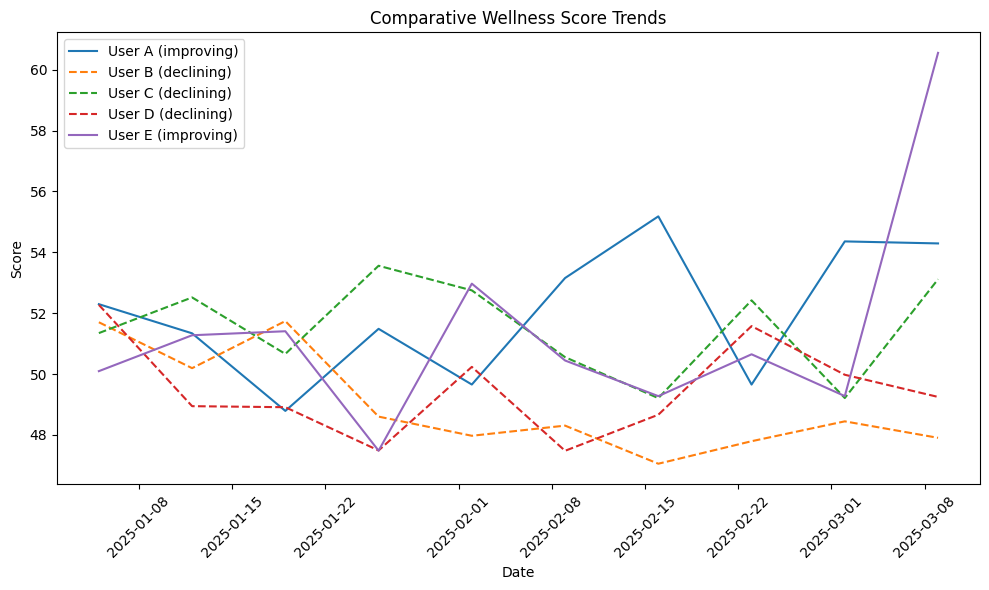

In [6]:
# Plot Comparative Trends

plot_trends(
    df,
    slopes,
    date_col='Date',
    score_col='Score',
    user_col='User',
    status=trends
)